In [1]:
import pandas as pd                      # For handling tabular data (not strictly used here but often helpful)
import numpy as np                       # For numerical operations and array handling
import matplotlib.pyplot as plt          # For creating visual plots
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer


# Load and prepare the data again
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split into features and target
X = df.drop('target', axis=1)
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

# Define the logistic regression pipeline
def pipeline_logistic_regression():
    return Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectFromModel(LogisticRegression(random_state=101))),
        ('model', LogisticRegression(random_state=101))
    ])

# Create, fit, predict
pipeline = pipeline_logistic_regression()
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Evaluate
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions, target_names=['Malignant', 'Benign'])

conf_matrix, class_report


(array([[40,  2],
        [ 0, 72]]),
 '              precision    recall  f1-score   support\n\n   Malignant       1.00      0.95      0.98        42\n      Benign       0.97      1.00      0.99        72\n\n    accuracy                           0.98       114\n   macro avg       0.99      0.98      0.98       114\nweighted avg       0.98      0.98      0.98       114\n')

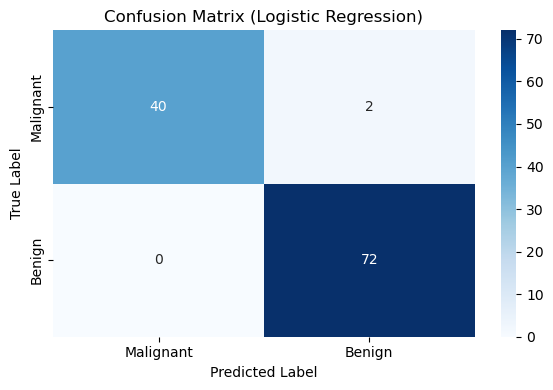

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Logistic Regression)')
plt.tight_layout()
plt.show()


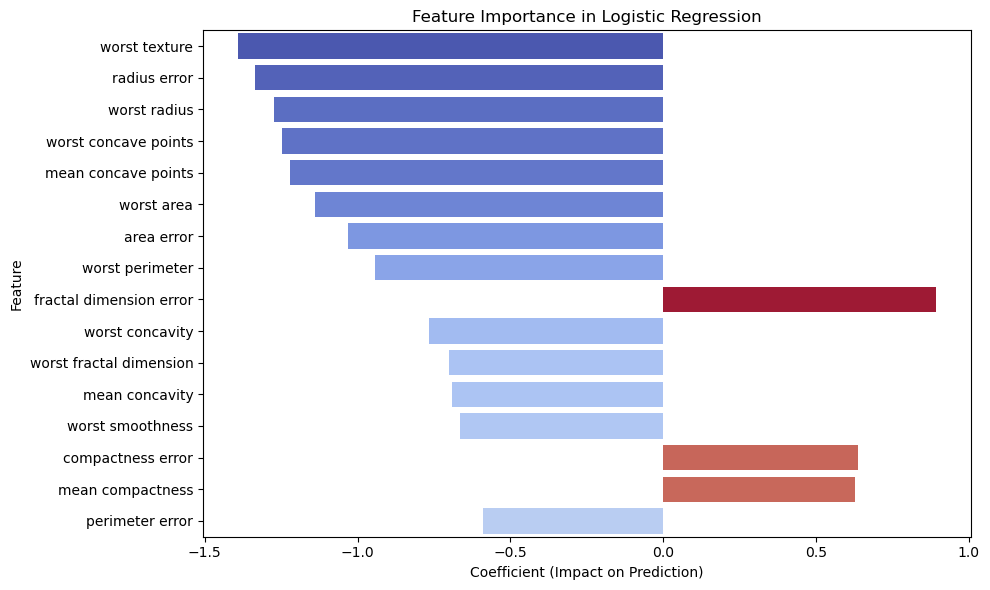

In [3]:
# Get the logistic regression model inside the pipeline
model = pipeline.named_steps['model']

# Get feature names (after selection)
selected_features = X.columns[pipeline.named_steps['selector'].get_support()]

# Get coefficients
coefficients = model.coef_[0]

# Create DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Coefficient', y='Feature', hue='Coefficient', dodge=False, palette='coolwarm', legend=False)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient (Impact on Prediction)')
plt.tight_layout()
plt.show()
